In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt
import seaborn as sn 
import numpy as np

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374

In [3]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status","hh_size_members","land_cultivated_ha"]) #this is the column that we are going to use
processed__data=pd.DataFrame(processed_data,columns=["id_country","country","id_proj"])
#select the using data columns in processed_data

In [4]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data
food_safety_tz["id_proj"].unique() #see the projects' kinds 

array(['cfm', 'cra', 'glv', 'srl'], dtype=object)

In [5]:
class_mapping = {'food_secure':1, 'mildly_fi':2,'moderately_fi':3,'severely_fi':4} #convert string to number
food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3071095337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)


In [6]:
food_safety_tz=food_safety_tz.dropna(subset=['land_cultivated_ha'])#drop the nan value in the land_cultivated_ha column
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] >0] #select the value >0
food_safety_tz=food_safety_tz.dropna(subset=['hh_size_members'])#drop the nan value in the hh_size_number column
food_safety_tz=food_safety_tz.loc[food_safety_tz['hh_size_members'] >0] #select the value >0

## 1.Visualizing through matplotlib boxplot using plt.boxplot().
## 2.Using 1.5 IQR rule.

In [7]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']

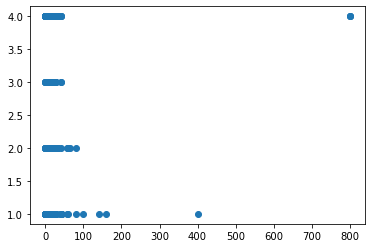

In [8]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

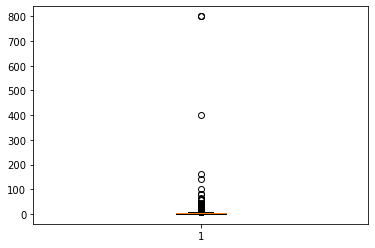

<Figure size 720x504 with 0 Axes>

In [9]:
plt.boxplot(land_cultivated_data)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [10]:
# finding the 1st quartile
q1 = np.quantile(land_cultivated_data, 0.25)

# finding the 3rd quartile
q3 = np.quantile(land_cultivated_data, 0.75)
med = np.median(land_cultivated_data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


3.0 8.5 -3.5


In [11]:
outliers = land_cultivated_data[(land_cultivated_data <= lower_bound) | (land_cultivated_data >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28940    14.0
28977    10.0
28978    21.0
29119     9.6
29160    12.0
         ... 
31571    13.2
31578    20.0
31605    10.0
31625     9.6
31628    12.0
Name: land_cultivated_ha, Length: 234, dtype: float64


## Remove outliers of land_culitivated_data

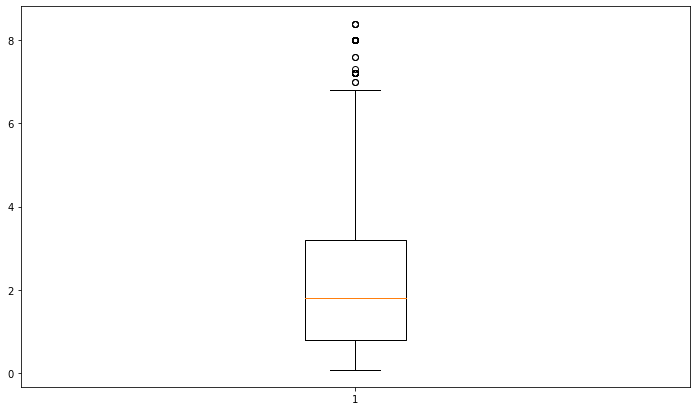

In [12]:
# boxplot of data within the whisker
land_cultivated_data = land_cultivated_data[(land_cultivated_data > lower_bound) & (land_cultivated_data < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(land_cultivated_data)
plt.show()


In [13]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >= lower_bound)&(food_safety_tz['land_cultivated_ha'] <= upper_bound) ] #select the value based on the previous outliers

In [14]:
food_safety_tz

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,1,4,0.8
28767,tz,tanzania,cfm,1,10,0.8
28768,tz,tanzania,cfm,1,5,0.8
28769,tz,tanzania,cfm,1,11,1.2
28770,tz,tanzania,cfm,4,6,0.8
...,...,...,...,...,...,...
31641,tz,tanzania,srl,1,3,2.8
31642,tz,tanzania,srl,4,1,3.6
31643,tz,tanzania,srl,4,4,4.0
31644,tz,tanzania,srl,4,2,2.8


## Remove outliers of hh_size_members

In [15]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

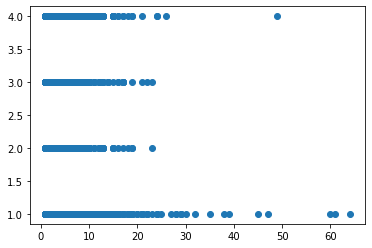

In [16]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

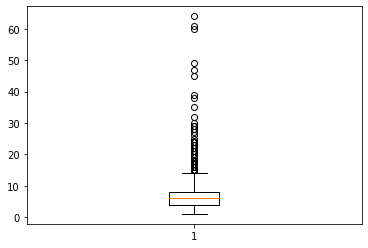

<Figure size 720x504 with 0 Axes>

In [17]:
plt.boxplot(hh_size_members)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [18]:
# finding the 1st quartile
q1 = np.quantile(hh_size_members, 0.25)

# finding the 3rd quartile
q3 = np.quantile(hh_size_members, 0.75)
med = np.median(hh_size_members)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


4.0 14.0 -2.0


In [19]:
outliers = hh_size_members[(hh_size_members <= lower_bound) | (hh_size_members >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28815    14
28979    16
29015    17
29026    45
29079    21
         ..
31154    16
31186    14
31188    24
31195    14
31464    61
Name: hh_size_members, Length: 138, dtype: int64


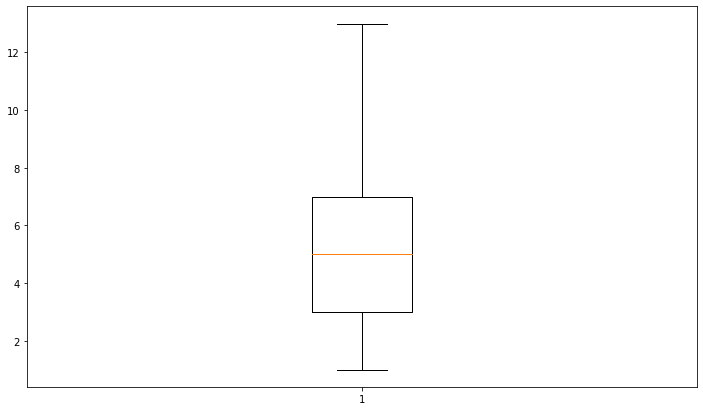

In [20]:
# boxplot of data within the whisker
hh_size_members = hh_size_members[(hh_size_members > lower_bound) & (hh_size_members < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(hh_size_members)
plt.show()

In [21]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['hh_size_members'] > lower_bound)&(food_safety_tz['hh_size_members'] < upper_bound) ] #select the value based on the previous outliers

In [22]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

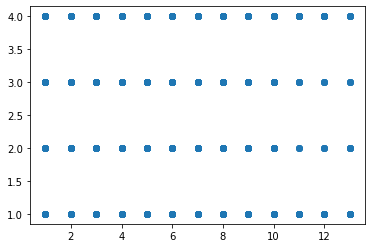

In [23]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

In [24]:
df_food = pd.DataFrame(food_safety_tz,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix = df_food.corr()
print (corrMatrix) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.165843            0.048059
hh_size_members        -0.165843         1.000000            0.139270
land_cultivated_ha      0.048059         0.139270            1.000000


In [25]:
food_safety_tz.mean()

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1846632248.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food_safety_tz.mean()


hfias_status          2.216852
hh_size_members       5.626176
land_cultivated_ha    2.299776
dtype: float64

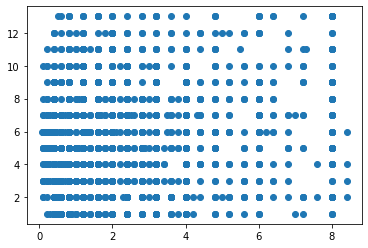

In [26]:
plt.scatter(land_cultivated_data,hh_size_members) # the relationship after cleaning the data

## Project CFM 

In [27]:
food_safety_cfm=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cfm']#select the CFM from the data

In [28]:
land_cultivated_data_cfm=food_safety_cfm['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cfm=food_safety_cfm['hh_size_members']
hfias_hh_cfm = food_safety_cfm['hfias_status']

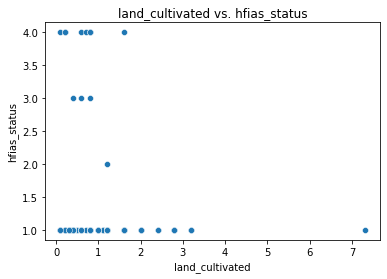

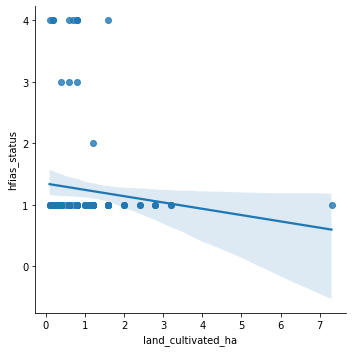

In [29]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cfm);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cfm);

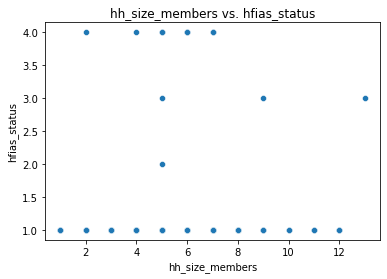

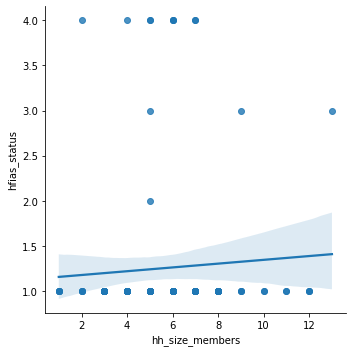

In [30]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_cfm);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_cfm);

Text(0.5, 1.0, 'hfias_cfm')

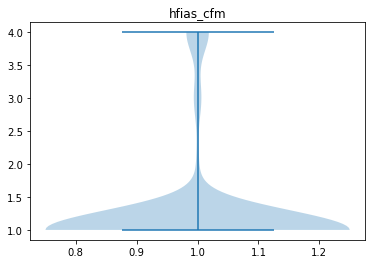

In [31]:
hfias_status_cfm = food_safety_cfm['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_cfm])
ax.set_title('hfias_cfm')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.061474           -0.107021
hh_size_members         0.061474         1.000000            0.236005
land_cultivated_ha     -0.107021         0.236005            1.000000


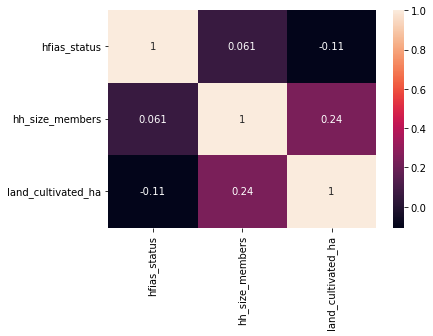

In [32]:
df_food_cfm = pd.DataFrame(food_safety_cfm,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cfm = df_food_cfm.corr()
print (corrMatrix_cfm) 
sn.heatmap(corrMatrix_cfm, annot=True)
plt.show()

In [33]:
food_safety_cfm_1=food_safety_cfm

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.dummy import DummyRegressor # the baseline that we are going to use
import numpy as np #linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math

In [35]:
food_safety_cfm_1.drop(columns='id_country', inplace=True)
food_safety_cfm_1.drop(columns='country', inplace=True)
food_safety_cfm_1.drop(columns='id_proj', inplace=True)
food_safety_cfm_1_1=pd.DataFrame(food_safety_cfm_1,columns=["hfias_status","hh_size_members"])
food_safety_cfm_1_2=pd.DataFrame(food_safety_cfm_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1329835901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cfm_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1329835901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cfm_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1329835901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [36]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cfm_1_1.drop(columns=target)
y = food_safety_cfm_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.07114933541829538
MSE: 0.035574667709147766
RMSE: 0.18861248025819438
R2: -0.040000000000000036


In [37]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cfm_1_2.drop(columns=target)
y = food_safety_cfm_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.06994155164141184
MSE: 0.03497077582070593
RMSE: 0.18700474812342582
R2: -0.040000000000000036


## Project CRA

In [38]:
food_safety_cra=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cra']#select the CRM project from the data

In [39]:
land_cultivated_data_cra=food_safety_cra['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=food_safety_cra['hh_size_members']
hfias_hh_cra = food_safety_cra['hfias_status']

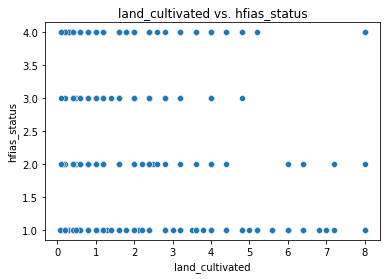

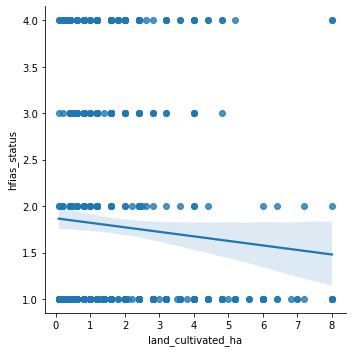

In [40]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cra);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_cra);

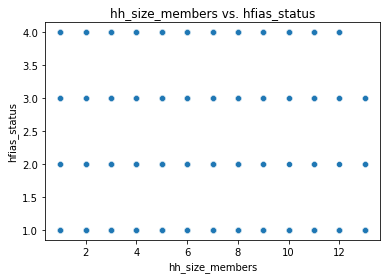

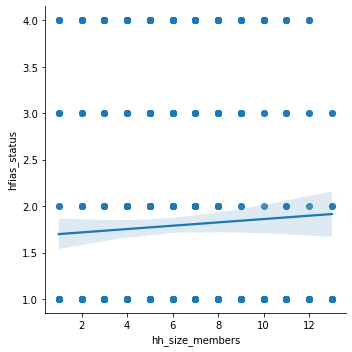

In [41]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_cra);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_cra);

Text(0.5, 1.0, 'hfias_cra')

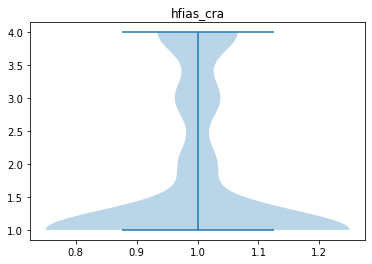

In [42]:
hfias_status_cra = food_safety_cra['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_cra])
ax.set_title('hfias_cra')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.040688           -0.060283
hh_size_members         0.040688         1.000000            0.230299
land_cultivated_ha     -0.060283         0.230299            1.000000


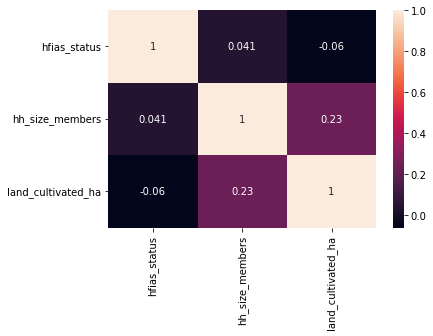

In [43]:
df_food_cra = pd.DataFrame(food_safety_cra,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cra = df_food_cra.corr()
print (corrMatrix_cra) 
sn.heatmap(corrMatrix_cra, annot=True)
plt.show()

In [44]:
food_safety_cra_1=food_safety_cra

In [45]:
food_safety_cra_1.drop(columns='id_country', inplace=True)
food_safety_cra_1.drop(columns='country', inplace=True)
food_safety_cra_1.drop(columns='id_proj', inplace=True)
food_safety_cra_1_1=pd.DataFrame(food_safety_cra_1,columns=["hfias_status","hh_size_members"])
food_safety_cra_1_2=pd.DataFrame(food_safety_cra_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3449325144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cra_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3449325144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_cra_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3449325144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [46]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cra_1_1.drop(columns=target)
y = food_safety_cra_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.9802365481183533
MSE: 1.3307380681147547
RMSE: 1.1535762081955205
R2: -0.03960600404626931


In [47]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_cra_1_2.drop(columns=target)
y = food_safety_cra_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 0.9485209849654455
MSE: 1.2799347369429945
RMSE: 1.1313420070619646
R2: -0.005956044455611509


## Project GLV

In [48]:
food_safety_glv=food_safety_tz.loc[food_safety_tz['id_proj'] == 'glv']#select the GLV project from the data

In [49]:
land_cultivated_data_glv=food_safety_glv['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=food_safety_glv['hh_size_members']
hfias_hh_glv = food_safety_glv['hfias_status']

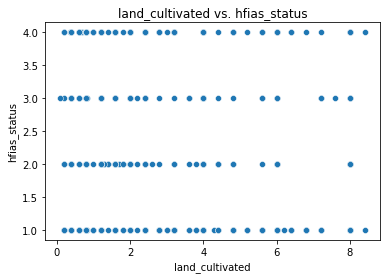

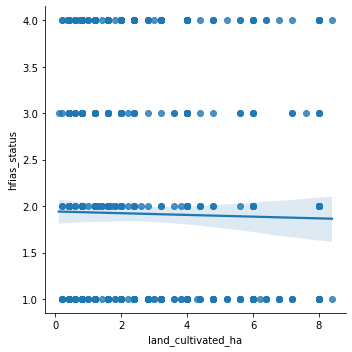

In [50]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_glv);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_glv);

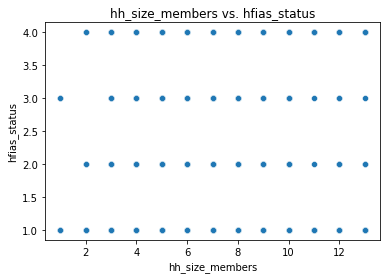

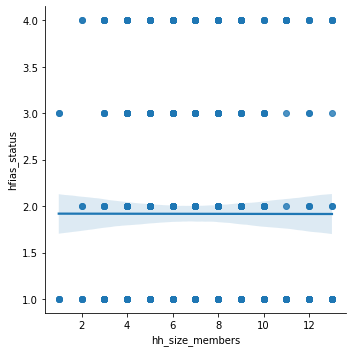

In [51]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_glv);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_glv);

Text(0.5, 1.0, 'hfias_glv')

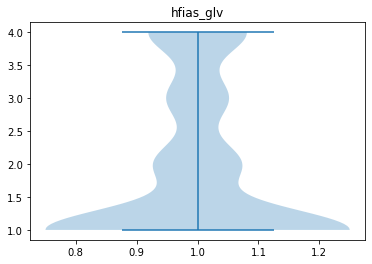

In [52]:
hfias_status_glv = food_safety_glv['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_glv])
ax.set_title('hfias_glv')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.000694           -0.017015
hh_size_members        -0.000694         1.000000            0.236093
land_cultivated_ha     -0.017015         0.236093            1.000000


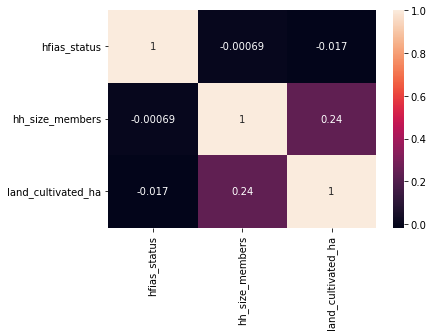

In [53]:
df_food_glv = pd.DataFrame(food_safety_glv,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_glv = df_food_glv.corr()
print (corrMatrix_glv) 
sn.heatmap(corrMatrix_glv, annot=True)
plt.show()

In [54]:
food_safety_glv_1=food_safety_glv

In [55]:
food_safety_glv_1.drop(columns='id_country', inplace=True)
food_safety_glv_1.drop(columns='country', inplace=True)
food_safety_glv_1.drop(columns='id_proj', inplace=True)
food_safety_glv_1_1=pd.DataFrame(food_safety_glv_1,columns=["hfias_status","hh_size_members"])
food_safety_glv_1_2=pd.DataFrame(food_safety_glv_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1095005347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_glv_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1095005347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_glv_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\1095005347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [56]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_glv_1_1.drop(columns=target)
y = food_safety_glv_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.0826867037707533
MSE: 1.5296470786420442
RMSE: 1.2367890194540232
R2: -0.06543406094056121


In [57]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_glv_1_2.drop(columns=target)
y = food_safety_glv_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.08995324513605
MSE: 1.5252204988435083
RMSE: 1.234998177668092
R2: -0.02460214825982352


## Project SRL

In [58]:
food_safety_srl=food_safety_tz.loc[food_safety_tz['id_proj'] == 'srl']#select the SRL project from the data

In [59]:
land_cultivated_data_srl=food_safety_srl['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_srl=food_safety_srl['hh_size_members']
hfias_hh_srl = food_safety_srl['hfias_status']

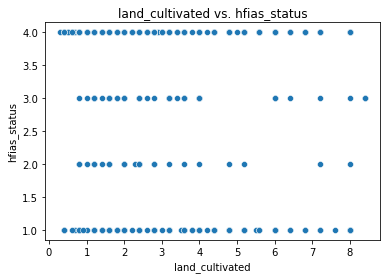

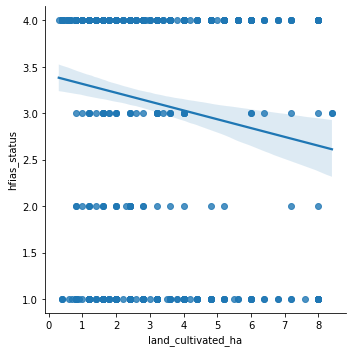

In [60]:
import seaborn as sns
ax=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_srl);
ax.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=food_safety_srl);

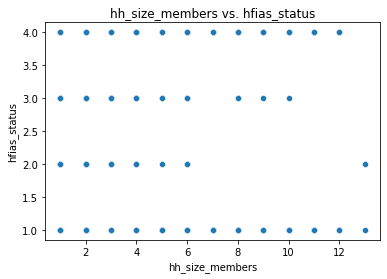

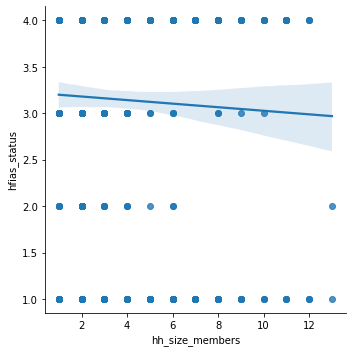

In [61]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=food_safety_srl);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=food_safety_srl);

Text(0.5, 1.0, 'hfias_srl')

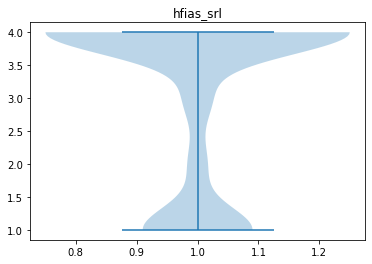

In [62]:
hfias_status_srl = food_safety_srl['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_srl])
ax.set_title('hfias_srl')

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.038002           -0.138276
hh_size_members        -0.038002         1.000000            0.116570
land_cultivated_ha     -0.138276         0.116570            1.000000


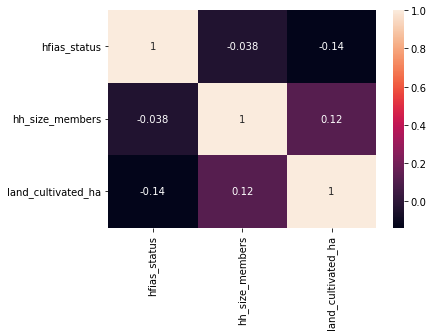

In [63]:
df_food_srl = pd.DataFrame(food_safety_srl,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_srl = df_food_srl.corr()
print (corrMatrix_srl) 
sn.heatmap(corrMatrix_srl, annot=True)
plt.show()

In [64]:
food_safety_srl_1=food_safety_srl

In [65]:
food_safety_srl_1.drop(columns='id_country', inplace=True)
food_safety_srl_1.drop(columns='country', inplace=True)
food_safety_srl_1.drop(columns='id_proj', inplace=True)
food_safety_srl_1_1=pd.DataFrame(food_safety_srl_1,columns=["hfias_status","hh_size_members"])
food_safety_srl_1_2=pd.DataFrame(food_safety_srl_1,columns=["hfias_status","land_cultivated_ha"]) 

C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3988250709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_srl_1.drop(columns='id_country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3988250709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_srl_1.drop(columns='country', inplace=True)
C:\Users\chenl\AppData\Local\Temp\ipykernel_18856\3988250709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [66]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_srl_1_1.drop(columns=target)
y = food_safety_srl_1_1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.1187305115865915
MSE: 1.5996638606403877
RMSE: 1.2647781863395604
R2: -0.003325045935744586


In [67]:
target = "hfias_status" #Select the data that we are going to use in the dataset
X = food_safety_srl_1_2.drop(columns=target)
y = food_safety_srl_1_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.1237269797820295
MSE: 1.611393415378455
RMSE: 1.2694067178719572
R2: -0.029386019679419183
